# Using mulit-linear regressions to predict housing prices

The below workbook finds creates a model based on a handful of key variables that can be used to predict housing prices. It explores different variables and different models. The result is reasonably successful but uses metrics that are delayed in reporting.

Next steps are to leverage this model with metrics that are more current or forward looking. This would create a model with a view into the market today, as opposed to a month or two ago.

Idea Source: https://python-bloggers.com/2021/01/predicting-home-price-trends-based-on-economic-factors-with-python/

## Supply Side Factors That Affect Home Prices
Various factors that affect the supply of homes available for sale are discussed below:

### Months of Supply
Months of supply is the basic measure of supply itself in the real estate market (not a factor as such). Houses for sale is another measure of the same.

Months of Supply: https://fred.stlouisfed.org/graph/?g=zneA  <br> 
Monthly Homes For Sale and Homes Sold (SA): https://www.census.gov/construction/nrs/historical_data/index.html

### Differential Migration Across Cities
The differential migration across cities can possibly be measured directly via change-of-address requests, but since that data is not readily available, the total number of residence moves can be used. What this, however, does not reflect is the change in pattern of movement. The move can be from rural or suburban to cities or the other way round, and both have a very different impact on the housing market. So, net domestic migration into or out of metropolises is a better measure of the differential migration, and hence that has been taken as a parameter along with the number of total movers.

Data Source (quarterly: https://www.census.gov/data/tables/time-series/demo/geographic-mobility/historic.html
'Interpolated Movers' and 'Interpolated Migration' NOT USED as not monthly

### Unemployment
Unemployment can also affect both demand and supply in the real estate industry. A high unemployment rate can mean that people simply do not have the money to spend on houses. It can also mean that there is lower investment in the industry and hence lower supply.

Monthly UNEMP: https://fred.stlouisfed.org/series/UNRATE

### Mortgage Rate
Mortgage rates are a huge factor that decide how well the real estate market will perform. It plugs into both supply and demand side of the equation. It affects the availability of financing options to buyers, as well as the ease of financing new constructions. It also affects the delinquency rate and the number of refinances for mortgages. People are more likely to default on a higher mortgage rate!

Monthly Mortgage Rate: https://fred.stlouisfed.org/graph/?g=zneW

### Federal Funds Rate
Although mortgage rate and Federal Funds Rate are usually closely related, sometimes they may not be. Historically, there have been occasions when the Fed lowered the Fed Funds Rate, but the banks did not lower mortgage rates, or not in the same proportion. Moreover, Federal Funds Rate influences multiple factors in the economy, beyond just the real estate market, many of which factors indirectly influence the real estate market. It is a key metric to change the way an economy is performing.

Monthly Fed Funds Rate: https://fred.stlouisfed.org/series/DFF#0

### USA GDP
The GDP is a measure of output of the economy overall, and the health of the economy. An economy that is doing well usually implies more investment and economic activity, and more buying.

Data Sources:
Monthly GDP Index: https://fred.stlouisfed.org/graph/?g=znfe <br>
Quarterly Real GDP (adjusted for inflation): https://fred.stlouisfed.org/series/GDPC1#0
NOT USED as not monthly

### Building Permits
Number of building permits allotted is a measure of not just health of real estate industry, but how free the real estate market is, effectively. It is an indicator of the extent of regulation/de-regulation of the market. It affects the supply through ease of putting a new property on the market.

Monthly Permits-Number and Permit-Valuation: https://www.census.gov/construction/bps/

### Housing Starts
This is a measure of the number of units of new housing projects started in a given period. Sometimes it is also measured in valuation of housing projects started in a given period.

Monthly Housing Starts: https://www.census.gov/construction/nrc/historical_data/index.html
Seasonally Adjusted 1 unit

### Construction Spending
The amount spent (in millions of USD, seasonally adjusted), is a measure of the activity in the construction industry, and an indicator of supply for future months. It can also be taken as a measure of confidence, since home builders will spend money in construction only if they expect the industry to do well in the future months.

Monthly CONST: https://www.census.gov/construction/c30/c30index.html
Private Residential, Seasonally Adjusted 


## Demand Side Factors That Affect Home Prices
Demand for housing, and specifically, home ownership, is affected by many factors, some of which are closely inter-related. Many of these factors also affect the supply in housing market. Below are a few factors that are prominent in influencing the demand for home buying:

### Affordability: Wages & Disposable Personal Income
The “weekly earnings” are taken as a measure of overall wages and earning of all employed persons.

The other measure is disposable personal income: how much of the earning is actually available to an individual for expenditure. This is an important measure as well, as it takes into account other factors like taxes etc.

Data Sources:
Median usual weekly nominal earnings, Wage and salary workers 25 years and over: https://fred.stlouisfed.org/series/LEU0252887700Q#0
Monthly Disposable Income: https://fred.stlouisfed.org/series/DSPIC96#0

### Delinquency Rate on Mortgages
The delinquency rate on housing mortgages are an indicator of the number of foreclosures in real estate. This is an important factor in both, demand and supply. Higher delinquency rate (higher than credit card delinquency rate) in the last economic recession was a key indicator of the recession and the poorly performing industry and the economy as a whole. It also indicates how feasible it is for a homeowner to buy a house at a certain point of time and is an indicator of the overall demand in the industry.

Data Source: https://fred.stlouisfed.org/series/DRSFRMACBS#0
NOT USED as not monthly

### Personal Savings
The extent to which people are utilizing their personal income for savings matters in overall investments and capital availability, and the interest rate for loans (and not just the mortgage rate). It is also an indicator of how much the current population is inclined to spend their money, vs save it for future use. This is an indicator of the demand for home ownership as well.

Monthly Savings: https://fred.stlouisfed.org/series/PMSAVE

### Behavioural Changes & Changes in Preferences
Changes in home ownership indicate a combination of factors including change in preferences and attitudes of people towards home buying. Change in cultural trends can only be captured by revealed preferences, and this metric can be taken as a revealed metric for propensity for home buying.

The other metric to track changes in preferences is personal consumption expenditure. For eg, if expenditure is increasing, but there is no such increase in homeownership, it would indicate a change in preferences towards home buying and ownership. Maybe people prefer to rent a home than buying one. Hence, both of these parameters are used.

Date Sources:
Home Ownership Rate (NOT USED as not monthly): http://bit.ly/homeownershiprate
Monthly Consumption: https://fred.stlouisfed.org/series/PCE

## Building The Model

The S&P Case-Shiller Housing Price Index is taken as the y variable, or dependent variable, as an indicator of change in prices. 

Monthly HPI: https://fred.stlouisfed.org/series/CSUSHPISA

## Data Cleanup

I have run the regression with fewer parameters, using only monthly data. SImilar anlaysis ahs been doen by others with more parameters reduced to quarterly, but it did not generate better results.

It's important to note that not all variables will be relavant and contribut positiviely to the model. Some variables that are tested will be discarded for the end analysis.

The data we are working with is time series data. So, all the time-date data in every variable must be converted to Python’s datetime format, for it to be read as time-date data and processed as such when up-sampling or down-sampling. This will also help with merging different series together, using the datetime columns.

The regression itself does not run on time-series data, so the datetime columns are removed in the final data for the regression.

## Multiple Linear Regression for Prediction
We'll first run a multi linear analysis and then comare it to some other models to verify it is a decent fit.

In [1]:
# load modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# load data
date_col1 = ['Period']
date_col2 = ['Quarter Starting']
date_col3 = ['Year']
date_col4 = ['Quarter'] 
x_monthly = pd.read_csv('x_monthly.csv', parse_dates=date_col1, dayfirst=True) #Monthly Data
y_monthly = pd.read_csv('y.csv', parse_dates=date_col1, dayfirst=True) #Monthly y Data 
print(x_monthly.dtypes, x_monthly.shape)
print(y_monthly.dtypes, y_monthly.shape)

Period                  datetime64[ns]
UNEMP                          float64
Months of Supply               float64
Homes for Sale                   int64
Homes for Sale NE                int64
Mortgage Rate                  float64
Permits-Valuation              float64
Permits-Valuation NE           float64
Permits-Number                 float64
Permits-Number NE              float64
Housing Starts                   int64
Housing Starts NE                int64
CONST                            int64
Consumption                    float64
Disposable Income              float64
Savings                        float64
Fed Funds Rate                 float64
Homes Sold                       int64
Homes Sold NE                    int64
GDP Monthly Index              float64
dtype: object (348, 20)
Period    datetime64[ns]
HPI              float64
dtype: object (348, 2)


Variables w NE are versions for Northeastern US and are not used in national analysis

In [40]:
# run initial regression
x = x_monthly[['UNEMP','Months of Supply','Homes for Sale','CONST','Consumption',
               'Disposable Income', ]] # removing date column for partial vairable list
"""
x = x_monthly[['UNEMP', 'Months of Supply','Homes for Sale', 'Mortgage Rate',
               'Permits-Number', 'Permits-Valuation', 'CONST','Housing Starts', 'Consumption', 
               'Disposable Income',  'Fed Funds Rate', 'Savings', 'Homes Sold', 
               'GDP Monthly Index']] # includes non-relavant variables"""

y = y_monthly['HPI'] #Removing date column
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, shuffle=False, stratify=None)
reg = LinearRegression()
reg.fit(x_train, y_train)
y_predict = reg.predict(x_test)

print(reg.intercept_)
print('R^2 Value of Train:', reg.score(x_train, y_train))
print('R^2 Value of Test:', reg.score(x_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('HPI Stats:')
print(y_test.describe())

-52.44072010133786
R^2 Value of Train: 0.9943744239817508
R^2 Value of Test: 0.985189225239867
Mean Absolute Error: 3.239201522536801
Mean Squared Error: 17.36855882919804
Root Mean Squared Error: 4.167560297008076
HPI Stats:
count    122.000000
mean     189.025828
std       34.385887
min      136.530000
25%      163.766000
50%      185.209000
75%      208.930750
max      279.801000
Name: HPI, dtype: float64


The R2 value above .95 is normally considered a good value, so we are in good shape there.

We want the Root Mean Squared Error to be less than 10% of the mean value of HPI, and much less than the standard deviation of the HPI in the test data. This indicates the the model is fairly accurate in predicting values and, again, we are good here.

Variable Notes: <br>
0 UNEMP increases accuracy a godo bit <br>
1 Months of Supply does little <br>
2 Homes for Sale does help good bit <br>
3 Mortgage Rate actually actually hurts but just a  little - DONT INCLUDE <br>
4 Permits Numbers burts a little - DONT INCLUDE <br>
5 Permit Evalution hurts a little - DONT INCLUDE <br>
6 CONST helps a good bit<br>
7 Housing Starts hurts a little - DONT INCLUDE <br>
8 Consumption Helps a good bit<br>
9 Disposable income helps some<br>
10 Fed Rate elps a little <br>
11 Savings brings accuracy down a good bit. - DONT INCLUDE <br>
12 Homes Sold brought accuracy down and increased error - DONT INCLUDE <br>
13  GDP Index brings both down - DONT INCLUDE<br>

In [41]:
# get importance of features
importance = reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 2.97180
Feature: 1, Score: 0.32376
Feature: 2, Score: 0.10478
Feature: 3, Score: 0.00008
Feature: 4, Score: 0.01079
Feature: 5, Score: 0.00104


Text(0.5, 1.0, 'Actual vs Predicted HPI: Monthly Data')

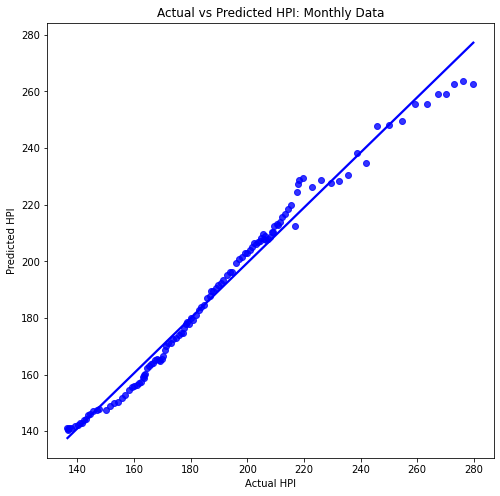

In [42]:
# lets plot predictions vs actuals to see how the spread looks
plt.figure(figsize=(8,8))
sb.regplot(x=y_test, y=y_predict, ci=None, color="Blue")
plt.xlabel("Actual HPI")
plt.ylabel('Predicted HPI')
plt.title("Actual vs Predicted HPI: Monthly Data")

**Graph shows that model is less accurate the higher the price is, and it undervalues higher prices. This is where we have been in late 2021, suggesting market is overvalued, or that certain variables are not being taken into account.**


In [43]:
# predict for all periods and compare on timeline to HPI
x_whole = x
y_predict_whole = reg.predict(x_whole)
y_monthly['y_predict_whole'] = y_predict_whole
y_monthly

y_monthly

,Period,HPI,y_predict_whole
0,1993-01-01,76.783,69.349429
1,1993-01-02,76.836,68.751298
2,1993-01-03,76.867,68.580511
3,1993-01-04,76.935,70.018295
4,1993-01-05,77.037,70.873751
...,...,...,...
343,2021-01-08,267.183,259.088625
344,2021-01-09,270.225,259.218006
345,2021-01-10,272.976,262.576902
346,2021-01-11,276.189,263.810809


<function matplotlib.pyplot.show(close=None, block=None)>

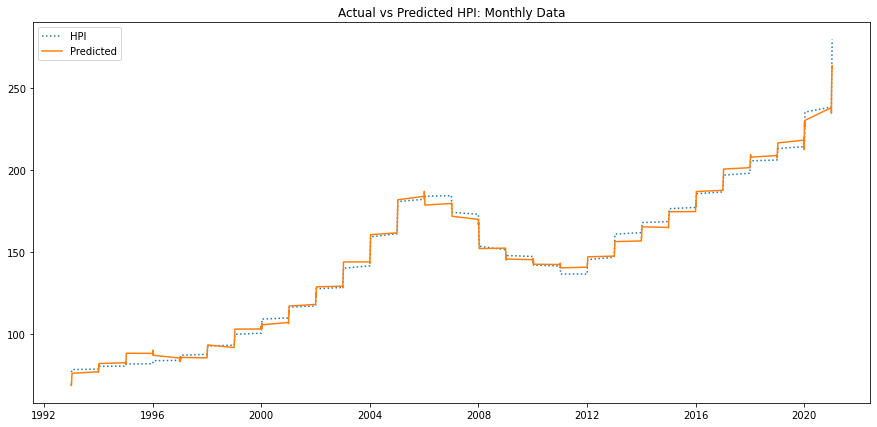

In [44]:
plt.figure(figsize=(15,7))
plt.plot(y_monthly['Period'], y_monthly['HPI'], label = "HPI",linestyle=":")
plt.plot(y_monthly['Period'], y_monthly['y_predict_whole'], label = "Predicted",linestyle="-")
plt.title("Actual vs Predicted HPI: Monthly Data")
plt.legend()
plt.show

Lasso(alpha=0.1, max_iter=2000)
r^2 on test data : 0.985706
Feature: 0, Score: 2.87260
Feature: 1, Score: 0.12847
Feature: 2, Score: 0.10782
Feature: 3, Score: 0.00008
Feature: 4, Score: 0.01137
Feature: 5, Score: 0.00057
##############################################
ElasticNet(alpha=0.1, l1_ratio=0.7, max_iter=2000)
r^2 on test data : 0.986077
Feature: 0, Score: 2.78929
Feature: 1, Score: 0.20772
Feature: 2, Score: 0.10533
Feature: 3, Score: 0.00008
Feature: 4, Score: 0.01147
Feature: 5, Score: 0.00040


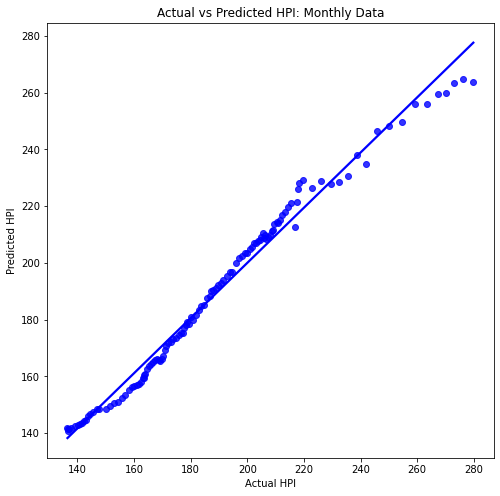

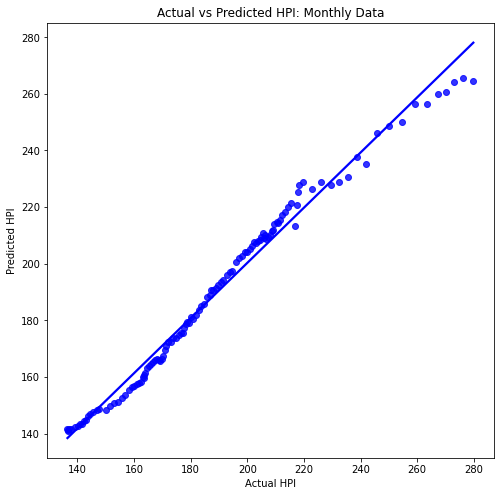

In [45]:
# Trying different regression model

# Lasso
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

alpha = 0.1
lasso = Lasso(alpha=alpha, max_iter=2000)

y_pred_lasso = lasso.fit(x_train, y_train).predict(x_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

plt.figure(figsize=(8,8))
sb.regplot(x=y_test, y=y_pred_lasso, ci=None, color="Blue")
plt.xlabel("Actual HPI")
plt.ylabel('Predicted HPI')
plt.title("Actual vs Predicted HPI: Monthly Data")

# get importance of features
importance = lasso.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

print('##############################################')
# ElasticNet
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7, max_iter=2000)

y_pred_enet = enet.fit(x_train, y_train).predict(x_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

plt.figure(figsize=(8,8))
sb.regplot(x=y_test, y=y_pred_enet, ci=None, color="Blue")
plt.xlabel("Actual HPI")
plt.ylabel('Predicted HPI')
plt.title("Actual vs Predicted HPI: Monthly Data")

# get importance of features
importance = enet.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))



Linear Regression seems to work just fine and even slightly better than some other models